# 연습문제 train으로 모델 만들고, test 모델 평가
xdata.shape    
from sklearn.model_selection import train_test_split        
xtrain, xtest, ytrain, ytest = train_test_split(xdata, ydata, test_size = 0.3, random_state = 321, shuffle = True)        

In [34]:
import pandas as pd
import numpy as np
import tensorflow.compat.v1 as tf # 1.XX version 을 사용 
tf.disable_v2_behavior() # 2.xx version 기능을 사용하지 않겠음
import seaborn as sns

In [2]:
data = pd.read_csv('C:\Python37_Project\딥러닝\diabetes.csv', names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class'])
data

,preg,plas,pres,skin,test,mass,pedi,age,class
0,-0.294118,0.487437,0.180328,-0.292929,0.000000,0.001490,-0.531170,-0.033333,0
1,-0.882353,-0.145729,0.081967,-0.414141,0.000000,-0.207153,-0.766866,-0.666667,1
2,-0.058824,0.839196,0.049180,0.000000,0.000000,-0.305514,-0.492741,-0.633333,0
3,-0.882353,-0.105528,0.081967,-0.535354,-0.777778,-0.162444,-0.923997,0.000000,1
4,0.000000,0.376884,-0.344262,-0.292929,-0.602837,0.284650,0.887276,-0.600000,0
...,...,...,...,...,...,...,...,...,...
754,0.176471,0.015075,0.245902,-0.030303,-0.574468,-0.019374,-0.920581,0.400000,1
755,-0.764706,0.226131,0.147541,-0.454545,0.000000,0.096870,-0.776260,-0.800000,1
756,-0.411765,0.216080,0.180328,-0.535354,-0.735225,-0.219076,-0.857387,-0.700000,1
757,-0.882353,0.266332,-0.016393,0.000000,0.000000,-0.102832,-0.768574,-0.133333,0


In [3]:
data.columns

Index(['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class'], dtype='object')

In [4]:
xdata = np.array(data[['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age']])
ydata = np.array(data[['class']])

In [5]:
from sklearn.model_selection import train_test_split        
xtrain, xtest, ytrain, ytest = train_test_split(xdata, ydata, test_size = 0.3, random_state = 321, shuffle = True)  

In [6]:
print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)


(531, 8)
(228, 8)
(531, 1)
(228, 1)


In [7]:
x = tf.placeholder(tf.float32, [None, 8])
y = tf.placeholder(tf.float32, [None, 1])
w = tf.Variable(tf.random_normal([8,1]))
b = tf.Variable(tf.random_normal([1]))


In [8]:
hf = tf.sigmoid(tf.matmul(x, w) +b)
cost = cost = -tf.reduce_mean(y*tf.log(hf)+(1-y)*tf.log(1-hf))

In [9]:
train = tf.train.GradientDescentOptimizer(0.01).minimize(cost)
predicted = tf.cast(hf > 0.5, dtype= tf.float32) # True -> 1.0, False -> 0.0
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, y), dtype=tf.float32))

In [10]:
with tf.Session() as sess: # sess = tf.Session() 과 같은 구문 -> sess.close. 들여쓰기가 되어있는 부분이 유효한 부분
    sess.run(tf.global_variables_initializer())
    for step in range(10001):
        _, cv = sess.run([train, cost], feed_dict = {x:xtrain, y:ytrain})
        if step%200 == 0:
            print(step, cv) 
    h, p, a = sess.run([hf, predicted, accuracy], feed_dict = {x:xtest, y:ytest})
    print('hf : ', h, 'pred : ', p , 'acc : ', a  )

0 0.8382433
200 0.586471
400 0.5432311
600 0.53153485
800 0.5254328
1000 0.5207234
1200 0.51661843
1400 0.51293236
1600 0.5095961
1800 0.50656676
2000 0.50381005
2200 0.5012966
2400 0.4990004
2600 0.4968987
2800 0.4949716
3000 0.49320114
3200 0.49157187
3400 0.49006972
3600 0.4886825
3800 0.48739928
4000 0.48621032
4200 0.48510697
4400 0.48408154
4600 0.483127
4800 0.48223734
5000 0.48140684
5200 0.48063064
5400 0.47990415
5600 0.47922346
5800 0.4785848
6000 0.47798494
6200 0.4774208
6400 0.4768898
6600 0.47638935
6800 0.47591722
7000 0.4754714
7200 0.47505
7400 0.47465137
7600 0.4742738
7800 0.47391602
8000 0.47357666
8200 0.47325444
8400 0.47294834
8600 0.47265726
8800 0.4723803
9000 0.47211665
9200 0.4718653
9400 0.47162566
9600 0.47139704
9800 0.4711788
10000 0.47097024
hf :  [[0.17557499]
 [0.89658535]
 [0.6431508 ]
 [0.84577155]
 [0.84234273]
 [0.712687  ]
 [0.8738564 ]
 [0.83985865]
 [0.5932    ]
 [0.5471027 ]
 [0.6199734 ]
 [0.82003665]
 [0.918669  ]
 [0.08435196]
 [0.94804984]

# 2번

In [11]:
data = pd.read_csv('C:/Python37_Project/딥러닝/pima-indians-diabetes.csv', names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class'])

In [12]:
data = data.astype(float)
data

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0,1.0
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0,0.0
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0,1.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0.0
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,1.0
...,...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,48.0,180.0,32.9,0.171,63.0,0.0
764,2.0,122.0,70.0,27.0,0.0,36.8,0.340,27.0,0.0
765,5.0,121.0,72.0,23.0,112.0,26.2,0.245,30.0,0.0
766,1.0,126.0,60.0,0.0,0.0,30.1,0.349,47.0,1.0


In [13]:
data.isnull().sum()

preg     0
plas     0
pres     0
skin     0
test     0
mass     0
pedi     0
age      0
class    0
dtype: int64

In [14]:
# 당뇨병 확률 구하기
data.groupby(['preg'])['class'].mean()

preg
0.0     0.342342
1.0     0.214815
2.0     0.184466
3.0     0.360000
4.0     0.338235
5.0     0.368421
6.0     0.320000
7.0     0.555556
8.0     0.578947
9.0     0.642857
10.0    0.416667
11.0    0.636364
12.0    0.444444
13.0    0.500000
14.0    1.000000
15.0    1.000000
17.0    1.000000
Name: class, dtype: float64

In [15]:
corr = data.corr(method= 'pearson')
corr

,preg,plas,pres,skin,test,mass,pedi,age,class
preg,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
plas,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
pres,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
skin,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
test,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
mass,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
pedi,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
class,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


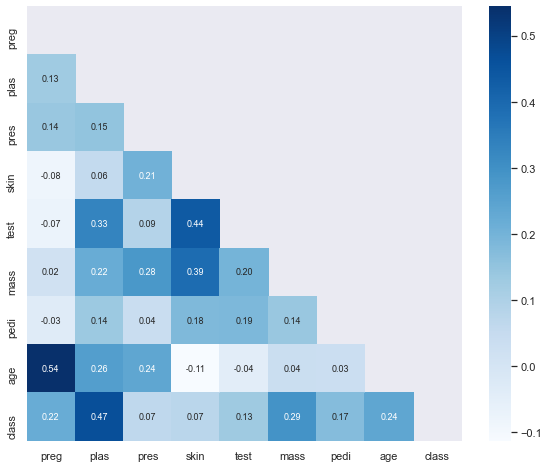

In [16]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True


cols = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
sns.set(font_scale = 1)

heat_map = sns.heatmap(corr.values, cbar = True, annot=True, square=True, 
fmt ='.2f', annot_kws={'size':9}, yticklabels = cols, xticklabels = cols, cmap='Blues', mask = mask)



In [17]:
xdata = np.array(data[['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age']])
ydata = np.array(data[['class']])

In [18]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
ss.fit(xdata)
xdata=ss.transform(xdata)

In [19]:
from sklearn.model_selection import train_test_split        
xtrain, xtest, ytrain, ytest = train_test_split(xdata, ydata, test_size = 0.3, random_state = 321, shuffle = True)  

In [20]:
ytest.shape 

(231, 1)

In [21]:
x = tf.placeholder(tf.float32, [None, 8])
y = tf.placeholder(tf.float32, [None, 1])
w = tf.Variable(tf.random_normal([8,1]))
b = tf.Variable(tf.random_normal([1]))

In [22]:
hf = tf.sigmoid(tf.matmul(x, w) + b)
cost = -tf.reduce_mean(y*tf.log(hf)+(1-y)*tf.log(1-hf))

train = tf.train.GradientDescentOptimizer(5e-3).minimize(cost)
predicted = tf.cast(hf > 0.5, dtype= tf.float32) # True -> 1.0, False -> 0.0
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, y), dtype=tf.float32))

In [35]:
with tf.Session() as sess: # sess = tf.Session() 과 같은 구문 -> sess.close. 들여쓰기가 되어있는 부분이 유효한 부분
    sess.run(tf.global_variables_initializer())
    for step in range(10001):
        _, cv = sess.run([train, cost], feed_dict = {x:xtrain,y:ytrain})

        if step%200 == 0:
            print(step, cv)
    h, p, a = sess.run([hf, predicted, accuracy], feed_dict = {x:xtest, y:ytest})
    print('hf : ', h, 'pred : ', p , 'acc : ', a  )

0 1.1645517
200 0.97406846
400 0.8357275
600 0.7359516
800 0.6635401
1000 0.61036336
1200 0.57095575
1400 0.54157037
1600 0.51954395
1800 0.5029428
2000 0.49035138
2200 0.480733
2400 0.47332856
2600 0.46758202
2800 0.46308544
3000 0.4595381
3200 0.45671728
3400 0.45445678
3600 0.4526318
3800 0.45114794
4000 0.4499333
4200 0.44893262
4400 0.44810322
4600 0.4474118
4800 0.4468323
5000 0.4463442
5200 0.44593114
5400 0.4455801
5600 0.44528043
5800 0.44502378
6000 0.44480315
6200 0.44461286
6400 0.4444483
6600 0.44430563
6800 0.44418156
7000 0.44407353
7200 0.44397914
7400 0.4438966
7600 0.44382423
7800 0.4437608
8000 0.44370505
8200 0.44365597
8400 0.4436128
8600 0.44357467
8800 0.44354102
9000 0.4435113
9200 0.44348508
9400 0.44346178
9600 0.44344127
9800 0.44342306
10000 0.4434069
hf :  [[0.2354677 ]
 [0.29532713]
 [0.8165655 ]
 [0.1074996 ]
 [0.09354675]
 [0.06251696]
 [0.04569653]
 [0.15423438]
 [0.27602363]
 [0.32597893]
 [0.8974177 ]
 [0.2341643 ]
 [0.5817972 ]
 [0.16435173]
 [0.2232

# 3번 독버섯 분류

# 4번

In [24]:
from pandas_datareader import data
import yfinance as fix
fix.pdr_override()

start_date = '2015-01-01' 
end_date = '2020-06-30' 
samsung = data.get_data_yahoo('005930.KS', start_date, end_date)

[*********************100%***********************]  1 of 1 completed


In [25]:
samsung

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-02,26800.0,26800.0,26540.0,26600.0,257.958313,8774950
2015-01-05,26720.0,26720.0,26260.0,26660.0,258.540161,10139500
2015-01-06,26300.0,26340.0,25760.0,25900.0,251.169937,15235500
2015-01-07,25880.0,26220.0,25640.0,26140.0,253.497406,14322750
2015-01-08,26780.0,26780.0,26200.0,26280.0,254.855087,14477600
...,...,...,...,...,...,...
2020-06-23,52500.0,52800.0,51100.0,51400.0,51400.000000,18086152
2020-06-24,51900.0,53900.0,51600.0,52900.0,52900.000000,24519552
2020-06-25,52100.0,53000.0,51900.0,51900.0,51900.000000,18541624


In [26]:
import tensorflow as tf
import numpy as np
import matplotlib
import os
